<a href="https://colab.research.google.com/github/254-KIPSANG/EDA--PYTHON/blob/main/Financial_App_Security.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q google-play-scraper
import pandas as pd
from google_play_scraper import reviews
from google_play_scraper import Sort

# top Four apps
apps = {
    "Fidelity Crypto": "com.fidelity.android",
    "Crypto.com": "co.mona.android",
    "Robinhood Crypto": "com.robinhood.android",
    "Coinbase" : "com.coinbase.android"


}

SORT = Sort.NEWEST
N_REVIEWS = 10000
reviews_dict = {k: {} for k in apps}

# Scraping reviews
for app in apps.keys():
    reviews_dict[app], _ = reviews(
        apps[app],
        lang='en',
        country='us',
        sort=SORT,
        count=N_REVIEWS,
        filter_score_with=None
    )
    assert len(reviews_dict[app]) == N_REVIEWS

# Saving reviews
df = pd.DataFrame()
for app in apps.keys():
    SAVE_DIR = app + ".csv"
    temp_df = pd.DataFrame(
        reviews_dict[app],
        columns=["reviewId", "content", "score", "userName"]
    )
    temp_df.to_csv(SAVE_DIR, index=False)
    temp_df["app"] = app
    df = pd.concat((df, temp_df))

df.to_csv("all_combined.csv", index=False)
print("DONE :) ")
df.head()


In [ ]:
# Count the number of CSV files
num_csv_files = len(apps)
print(f"Number of CSV files created: {num_csv_files}")


Number of CSV files created: 4


In [ ]:
import pandas as pd
import numpy as np
from google_play_scraper import reviews, Sort

# Combine all reviews into a single DataFrame
df = pd.DataFrame()
for app in apps.keys():
    temp_df = pd.DataFrame(
        reviews_dict[app],
        columns=["reviewId", "content", "score", "userName"]
    )
    temp_df["app"] = app
    df = pd.concat((df, temp_df))

# Data Cleaning
# Convert 'score' column to numeric
df['score'] = pd.to_numeric(df['score'], errors='coerce')

# Drop rows with missing values
df.dropna(subset=['score'], inplace=True)

# Generate Summary Statistics
summary_statistics = df.groupby('app')['score'].agg(['mean', 'median', 'std', 'skew']).reset_index()

# Save the cleaned data
df.to_csv("cleaned_data.csv", index=False)
summary_statistics.to_csv("summary_statistics.csv", index=False)

print("Data cleaning and summary statistics generation complete.")

# Display the first few rows of the summary statistics
print(summary_statistics)


Data cleaning and summary statistics generation complete.
                app    mean  median       std      skew
0          Coinbase  3.1931     4.0  1.869268 -0.193836
1        Crypto.com  3.0305     3.0  1.825021 -0.044935
2   Fidelity Crypto  3.6861     5.0  1.642509 -0.743691
3  Robinhood Crypto  3.6748     5.0  1.675090 -0.748116


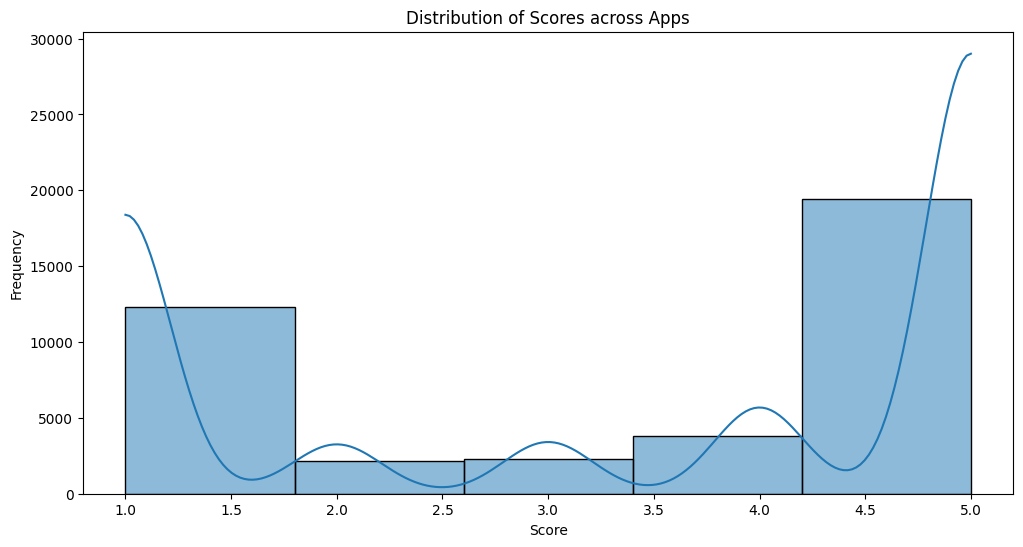

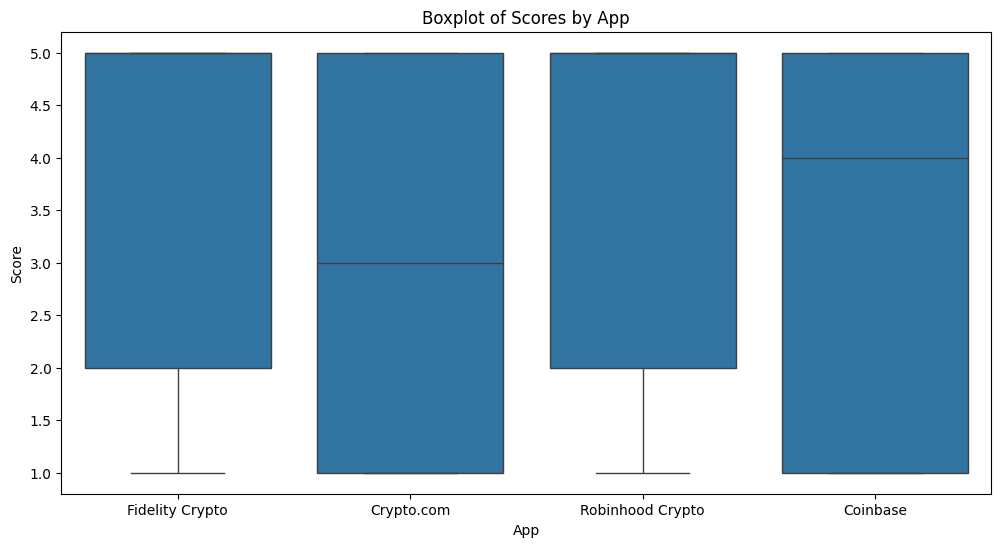

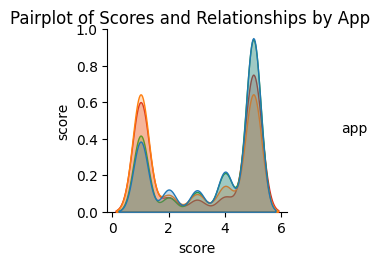

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google_play_scraper import reviews, Sort
# EDA
# Distribution of Scores
plt.figure(figsize=(12, 6))
sns.histplot(df['score'], bins=5, kde=True)
plt.title('Distribution of Scores across Apps')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Scores by App
plt.figure(figsize=(12, 6))
sns.boxplot(x='app', y='score', data=df)
plt.title('Boxplot of Scores by App')
plt.xlabel('App')
plt.ylabel('Score')
plt.show()

# Pairplot for Relationships
sns.pairplot(df, hue='app', diag_kind='kde')
plt.suptitle('Pairplot of Scores and Relationships by App', y=1.02)
plt.show()


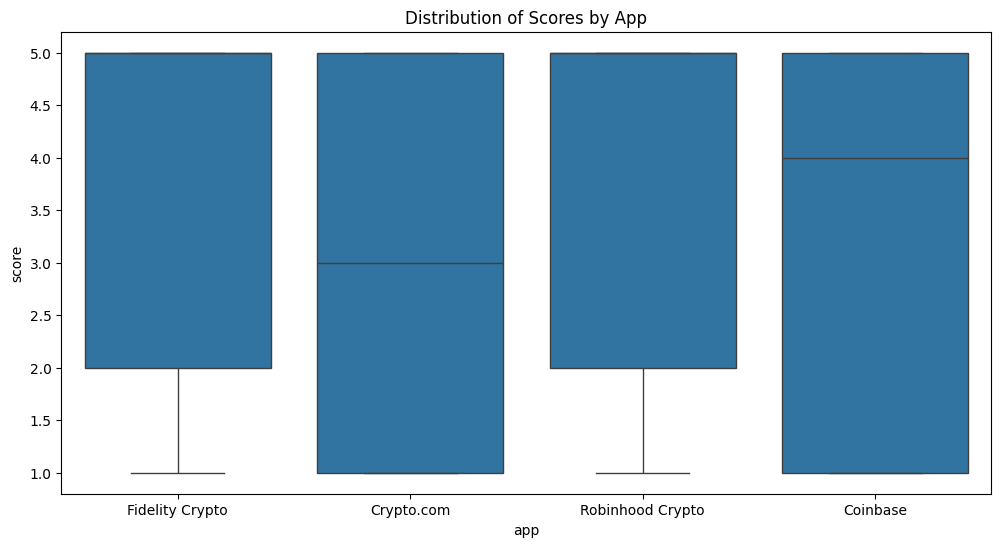

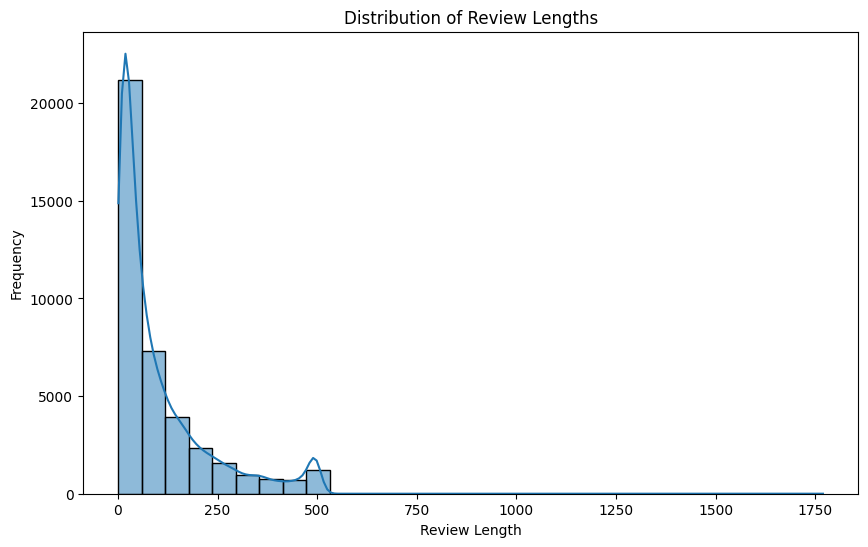

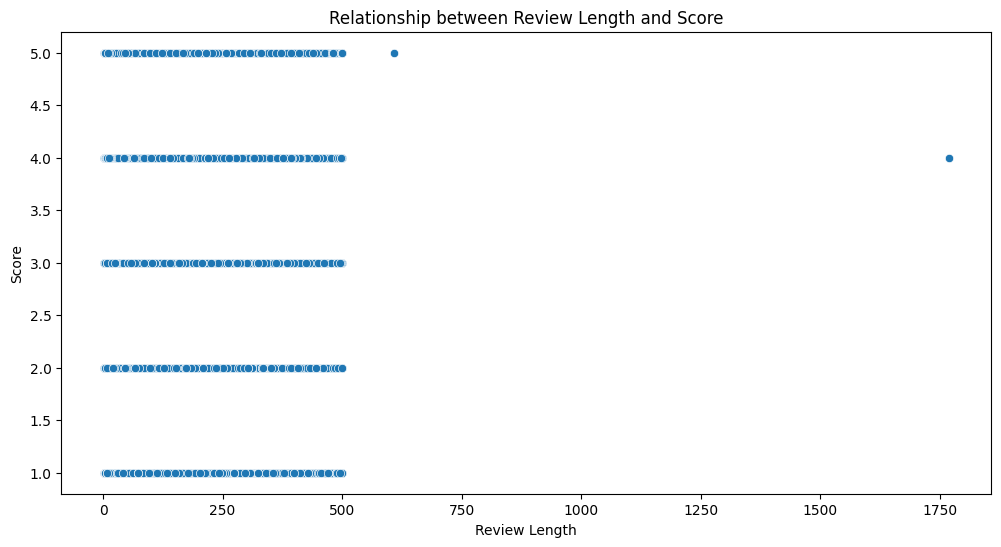

Data cleaning, summary statistics, and EDA complete.
                app    mean  median       std      skew
0          Coinbase  3.1931     4.0  1.869268 -0.193836
1        Crypto.com  3.0305     3.0  1.825021 -0.044935
2   Fidelity Crypto  3.6861     5.0  1.642509 -0.743691
3  Robinhood Crypto  3.6748     5.0  1.675090 -0.748116


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google_play_scraper import reviews, Sort


# Data Cleaning
# Convert 'score' column to numeric
df['score'] = pd.to_numeric(df['score'], errors='coerce')

# Drop rows with missing values
df.dropna(subset=['score'], inplace=True)

# Exploratory Data Analysis (EDA)
# 1. Distribution of Scores by App
plt.figure(figsize=(12, 6))
sns.boxplot(x='app', y='score', data=df)
plt.title('Distribution of Scores by App')
plt.show()

# 2. Distribution of Review Lengths
df['review_length'] = df['content'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# 3. Relationship between Review Length and Score
plt.figure(figsize=(12, 6))
sns.scatterplot(x='review_length', y='score', data=df)
plt.title('Relationship between Review Length and Score')
plt.xlabel('Review Length')
plt.ylabel('Score')
plt.show()

# Save the cleaned data
df.to_csv("cleaned_data.csv", index=False)

# Generate Summary Statistics
summary_statistics = df.groupby('app')['score'].agg(['mean', 'median', 'std', 'skew']).reset_index()
summary_statistics.to_csv("summary_statistics.csv", index=False)

print("Data cleaning, summary statistics, and EDA complete.")

# Display the first few rows of the summary statistics
print(summary_statistics)
